In the following you will find:

An attempt to understand the data as a whole with the bag of words method. 
A start to breaking the files down, by simply reading them in. 
Data output from the bag of words (txt and pdf)
Visualizations of the top 25 words used in all the txt and pdf files. 

Enjoy.

Also, please let me know what I can do better, improve my code, or if you like something you see, in the comments below.

In [1]:
import re
import os
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

stop_words = stopwords.words('english')

la_words = ['los','angeles','city','california']

for word in la_words:
    stop_words.append(word)

file_names = os.listdir("../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Job Bulletins/")

file_paths = []

for name in file_names:
    file_paths.append("../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Job Bulletins/" + name)

print(file_paths[0:5])

['../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Job Bulletins/PARK MAINTENANCE SUPERVISOR 3145 102618.txt', '../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Job Bulletins/ENVIRONMENTAL ENGINEER  7872 082616 REV 090116.txt', '../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Job Bulletins/MOTION PICTURE AND TELEVISION MANAGER 1789 111717.txt', '../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Job Bulletins/HOUSING INVESTIGATOR 8516 062918.txt', '../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Job Bulletins/DEPARTMENTAL CHIEF ACCOUNTANT 1593 111717 revised 11.21.txt']


In [2]:
full_text = {}

bag_of_words = {}

no_punct = re.compile(r'[\?\.\,\>\<\[\]\{\(\)\'\"\;\:\_\-\+\=\%\#\@\!\&\*\$\^]')
no_nums = re.compile(r'[0-9]+')
for path in file_paths:
    with open(path,'r',encoding='ascii',errors='replace') as my_file:
        temp = my_file.read()
        full_text[path] = (temp)
        temp = no_punct.sub(string=temp,repl='')
        temp = no_nums.sub(string=temp,repl='')
        for word in temp.lower().split():
            if not word in stop_words:
                if not word in bag_of_words.keys():
                    bag_of_words[word] = 1
                else:
                    bag_of_words[word] += 1
    my_file.close()

In [3]:
bag_of_words_df = pd.DataFrame({'words': list(bag_of_words.keys()), 'count':list(bag_of_words.values())})

In [4]:
print(bag_of_words_df.describe())
print('median: '+ str(bag_of_words_df['count'].median()))

             count
count  8564.000000
mean     61.618169
std     290.622930
min       1.000000
25%       1.000000
50%       3.000000
75%      12.000000
max    8144.000000
median: 3.0


In [5]:
top_25 = bag_of_words_df.nlargest(25, 'count')
top_25

,words,count
88,may,8144
23,candidates,7628
129,examination,5702
123,applicants,5179
99,experience,4118
94,qualifications,3816
174,time,3696
25,list,3660
89,required,3553
172,online,3501


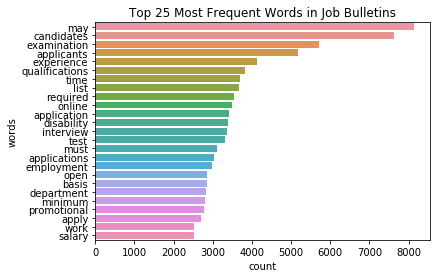

In [6]:
sns.barplot(x='count',y='words',data = top_25)
plt.title('Top 25 Most Frequent Words in Job Bulletins')
plt.show()

In [7]:
path_to_remove = re.compile(r'../input/cityofla/CityofLA/Job Bulletins/|[0-9]+|\.txt')
job_bullitens = []

for job in full_text.keys():
    job_bullitens.append(path_to_remove.sub(string=job,repl='').lower())


full_text_df = pd.DataFrame({'Job Bulletin':job_bullitens,'Job Bulletin Text':list(full_text.values())})

In [8]:
full_text_df.head()


,Job Bulletin,Job Bulletin Text
0,../input/data-science-for-good-city-of-los-ang...,PARK MAINTENANCE SUPERVISOR\n\nClass Code: ...
1,../input/data-science-for-good-city-of-los-ang...,ENVIRONMENTAL ENGINEER \n\nClass Code: 7...
2,../input/data-science-for-good-city-of-los-ang...,MOTION PICTURE AND TELEVISION MANAGER\n\n\nCla...
3,../input/data-science-for-good-city-of-los-ang...,HOUSING INVESTIGATOR\n\nClass Code: 8516...
4,../input/data-science-for-good-city-of-los-ang...,DEPARTMENTAL CHIEF ACCOUNTANT\n\n ...


In [9]:

full_pdf_text = pd.read_csv('../input/datascienceforgoodlapdftextuncleaned/all_pdf_text.csv')
print(full_pdf_text.shape)
full_pdf_text = full_pdf_text.dropna()
print(full_pdf_text.shape)

(3592, 2)
(3587, 2)


In [10]:
full_text_pdf = list(full_pdf_text['pdf_text_all'])
spaces = re.compile(r' {2,}|(\uf0a7)')
pdf_bag_of_words = {}
for text in full_text_pdf:
    text = spaces.sub(string = text, repl = ' ')
    text = no_punct.sub(string=text,repl='')
    text = no_nums.sub(string=text,repl='')
    for word in text.lower().split():
        if not word in stop_words:
            if not word in pdf_bag_of_words.keys():
                pdf_bag_of_words[word] = 1
            else:
                pdf_bag_of_words[word] += 1

In [11]:
pdf_bag_of_words_df = pd.DataFrame({'words':list(pdf_bag_of_words.keys()), 'count':list(pdf_bag_of_words.values())})
pdf_top_25 = pdf_bag_of_words_df.nlargest(25, 'count')
pdf_top_25

,words,count
26,may,15727
488,candidates,12019
442,examination,10213
430,applicants,8744
19,experience,7476
429,application,7288
1,department,6982
528,list,6887
189,open,6856
432,qualifications,6688


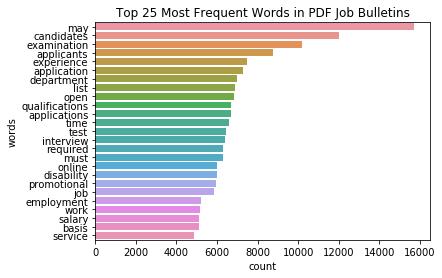

In [12]:
sns.barplot(x='count',y='words',data = pdf_top_25)
plt.title('Top 25 Most Frequent Words in PDF Job Bulletins')
plt.show()

In [13]:
full_text_df.to_csv('job_bulletin_text.csv')
bag_of_words_df.to_csv('from_txt_job_bulletins_bag_of_words.csv')
pdf_bag_of_words_df.to_csv('from_pdf_job_bulletins_bag_of_words.csv')

Thanks for reading... to be continued...

In [86]:
sentences = []
for text in full_text.values():
    temp = text.split('\n\n')
    for line in temp:
        temp2 = line.split('.')
        for sent in temp2:
            sent = sent.strip()
            sentences.append(sent)
len(sentences)

231511

In [89]:
sentences = [i for i in sentences if i]
len(sentences)

68377

['PARK MAINTENANCE SUPERVISOR',
 'Class Code:       3145\nOpen Date:  10-26-18\n(Exam Open to Current City Employees)',
 'ANNUAL SALARY',
 '$51,448 to $75,188\nThe salary in the Department of Water and Power is $83,728 to $88,405 and $87,341 to $92,206',
 'NOTES:',
 '1',
 'For information regarding reciprocity between the City of Los Angeles departments and LADWP, go to http://per',
 'lacity',
 'org/Reciprocity_CityDepts_and_DWP',
 'pdf',
 '2',
 'Candidates from the eligible list are normally appointed to vacancies in the lower pay grade positions',
 '3',
 'Annual salary is at the start of the pay range',
 'The current salary range is subject to change',
 'Please confirm the starting salary with the hiring department before accepting a job offer',
 'DUTIES',
 'A Park Maintenance Supervisor directly supervises a group of employees engaged in grounds and/or golf course maintenance, building custodial maintenance, or landscaping; or directs the grounds maintenance, building maintenance, o